<a href="https://colab.research.google.com/github/ShotaArima/GA-TSP/blob/main/GA_log_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


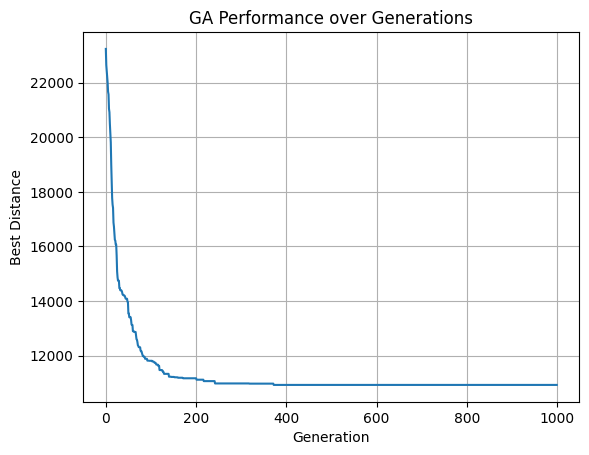

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/class/知能科学/log/log.csv")
plt.plot(df["Generation"], df["BestDistance"])
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.title("GA Performance over Generations")
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


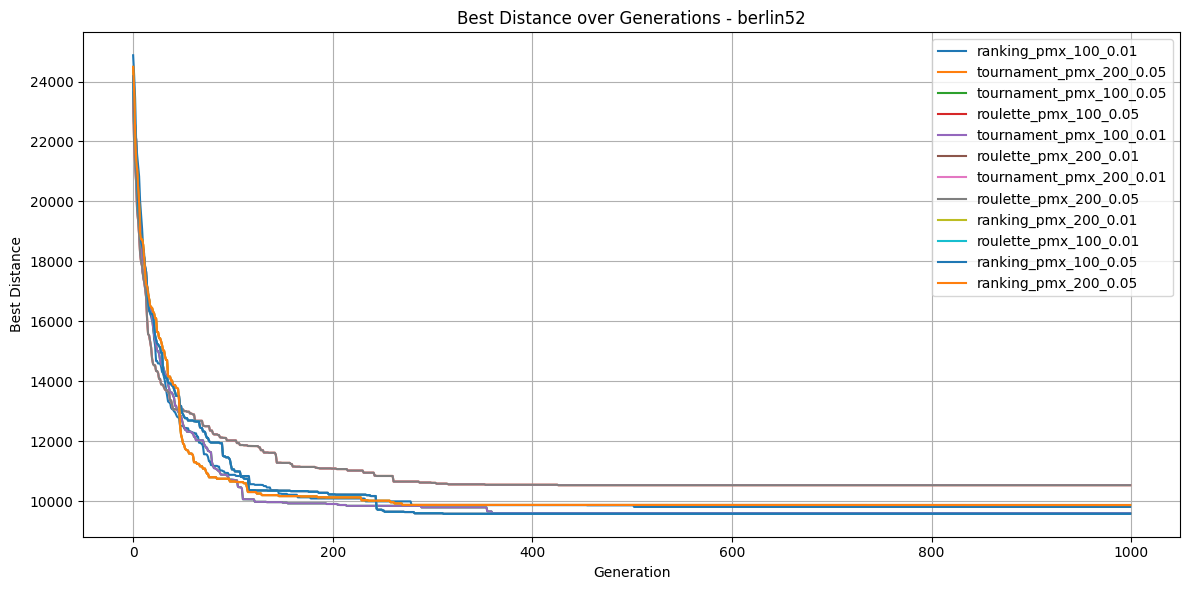

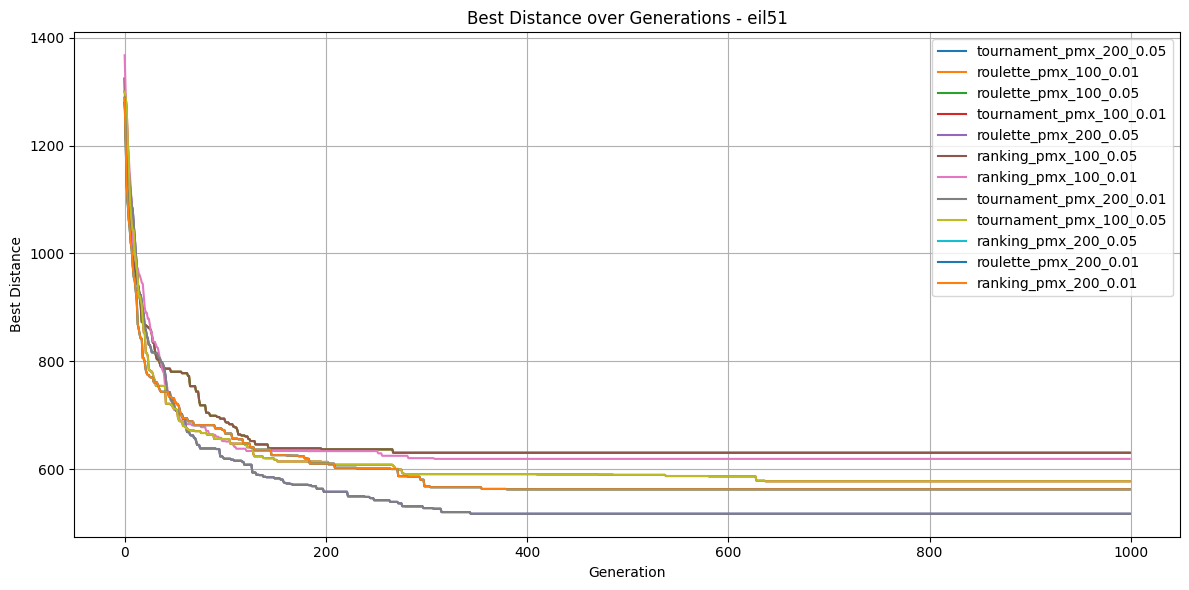

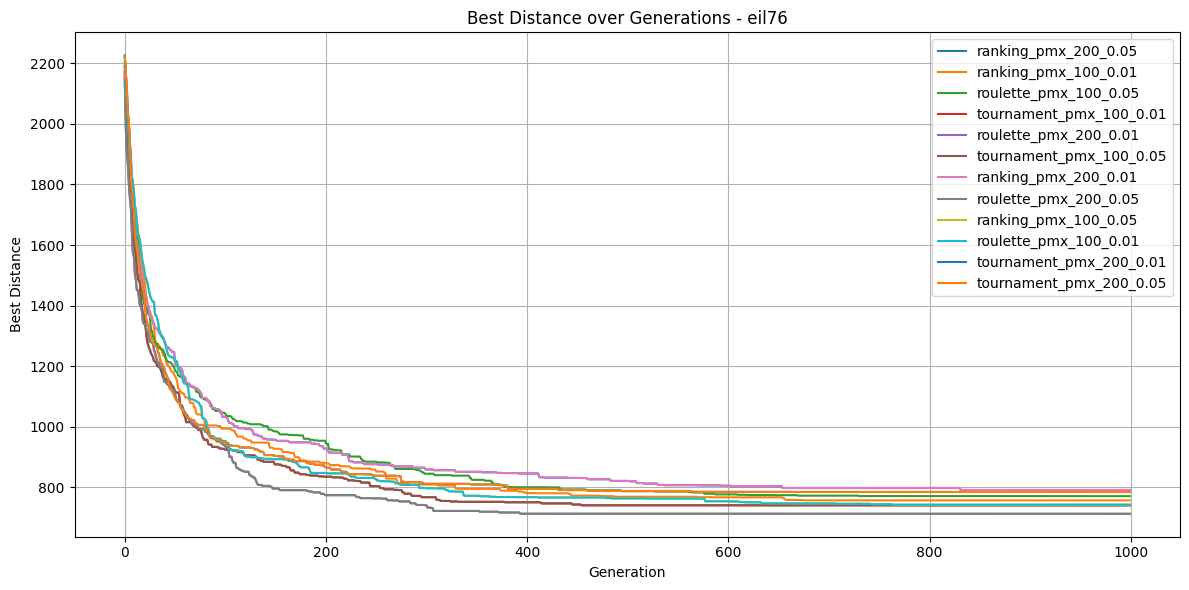

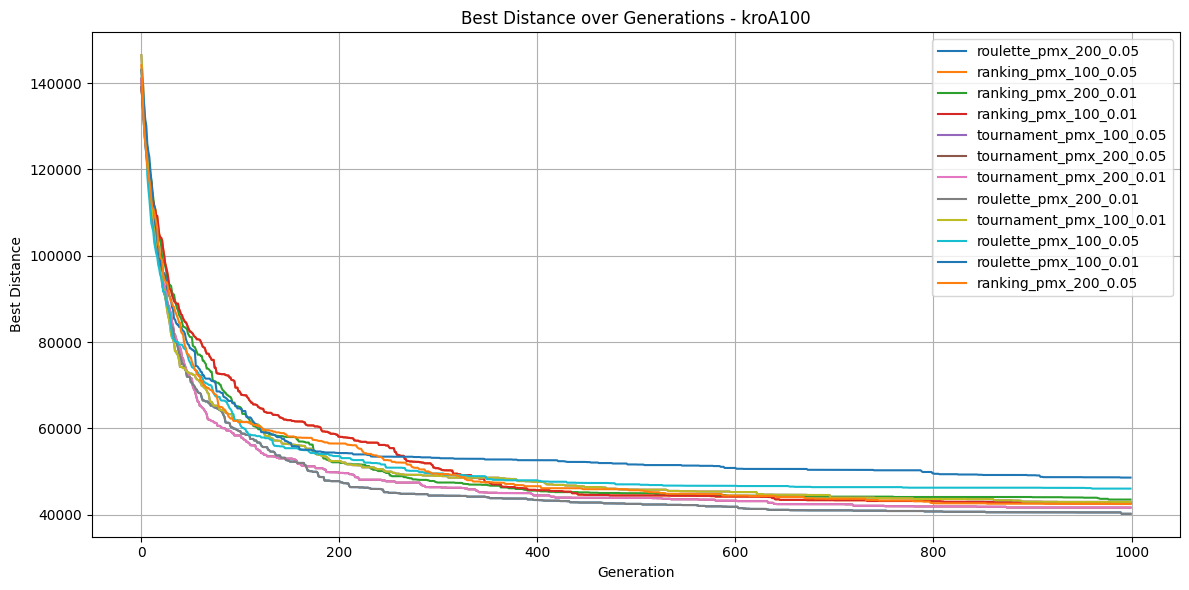


📊 最良結果（各データセットごと）:
berlin52: log_berlin52_roulette_pmx_100_0.05.csv -> BestDistance = 9579.519226
eil51: log_eil51_tournament_pmx_200_0.05.csv -> BestDistance = 517.390129
eil76: log_eil76_roulette_pmx_200_0.01.csv -> BestDistance = 713.064761
kroA100: log_kroA100_roulette_pmx_200_0.05.csv -> BestDistance = 40217.88094


In [10]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# ログファイルがあるディレクトリのパス
log_dir = "/content/drive/MyDrive/class/知能科学/log"

# log_*.csv ファイルを収集
csv_files = [f for f in os.listdir(log_dir) if f.startswith("log_") and f.endswith(".csv")]

# ファイル名から情報を抽出するための正規表現
pattern = re.compile(r"log_(.+?)_(.+?)_(.+?)_(\d+)_(\d+\.\d+)\.csv")

# データセットごとに分類
dataset_groups = {}

for file in csv_files:
    match = pattern.match(file)
    if not match:
        continue
    dataset, selection, crossover, popsize, mutation = match.groups()
    key = dataset
    if key not in dataset_groups:
        dataset_groups[key] = []
    dataset_groups[key].append({
        "file": os.path.join(log_dir, file),
        "selection": selection,
        "crossover": crossover,
        "popsize": int(popsize),
        "mutation": float(mutation)
    })

# 最良結果を記録
best_results = {}

# 各データセットごとにグラフ描画と最良結果の抽出
for dataset, runs in dataset_groups.items():
    plt.figure(figsize=(12, 6))
    best_distance = float('inf')
    best_file = ""

    for run in runs:
        file = run["file"]
        label = f'{run["selection"]}_{run["crossover"]}_{run["popsize"]}_{run["mutation"]}'
        df = pd.read_csv(file)

        # グラフ描画
        plt.plot(df["Generation"], df["BestDistance"], label=label)

        # 最終世代のBestDistanceで比較
        final_best = df["BestDistance"].iloc[-1]
        if final_best < best_distance:
            best_distance = final_best
            best_file = os.path.basename(file)

    plt.title(f"Best Distance over Generations - {dataset}")
    plt.xlabel("Generation")
    plt.ylabel("Best Distance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    best_results[dataset] = (best_file, best_distance)

# 最良結果を出力
print("\n📊 最良結果（各データセットごと）:")
for dataset, (file, dist) in best_results.items():
    print(f"{dataset}: {file} -> BestDistance = {dist}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-11-585fdd9f10b9>:78: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


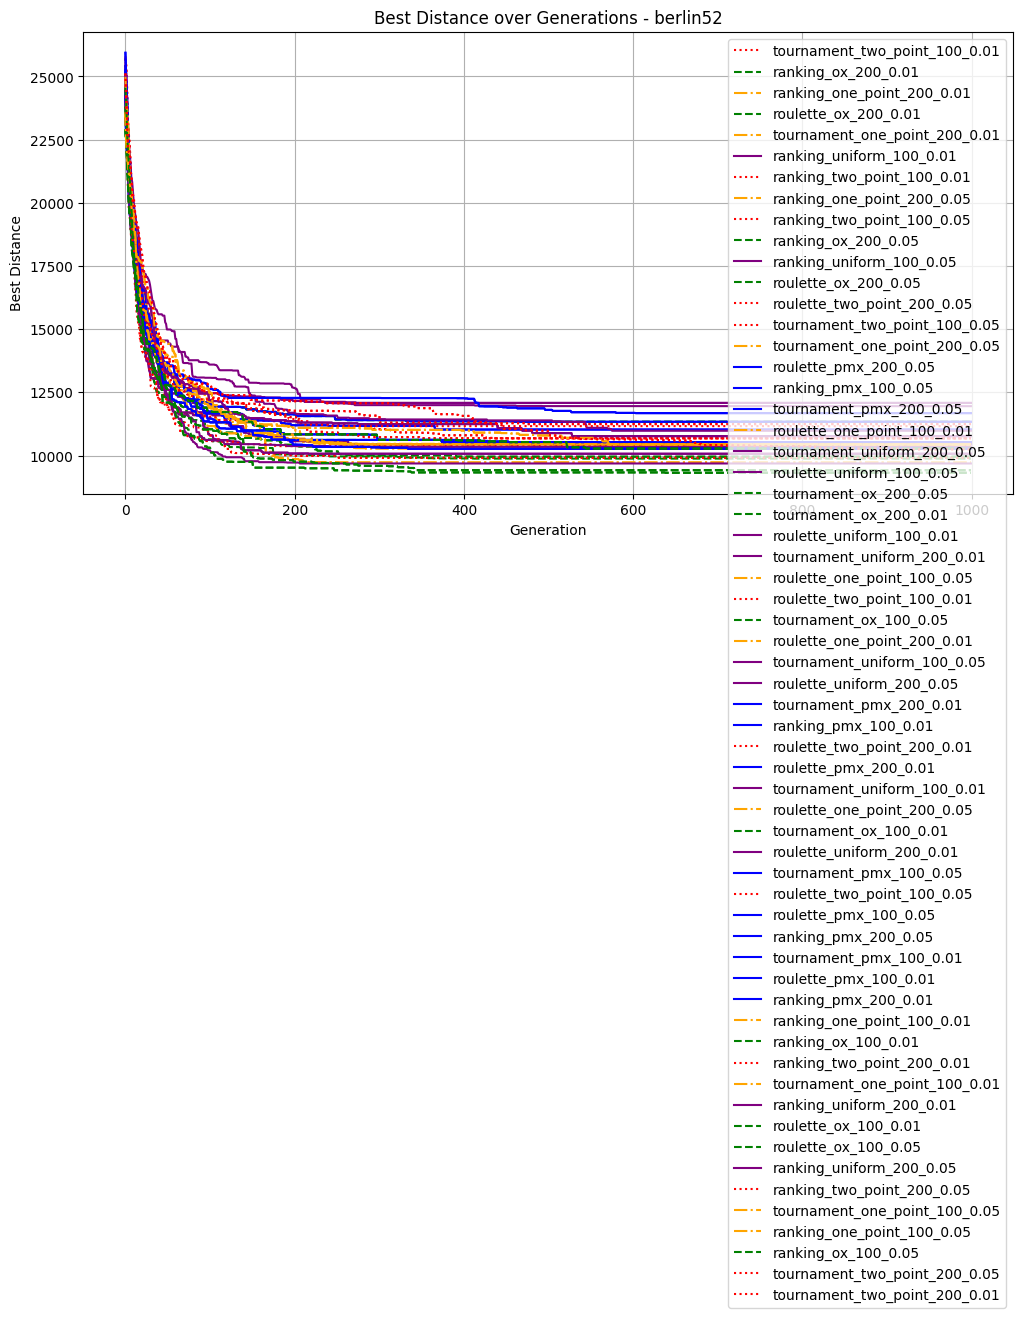

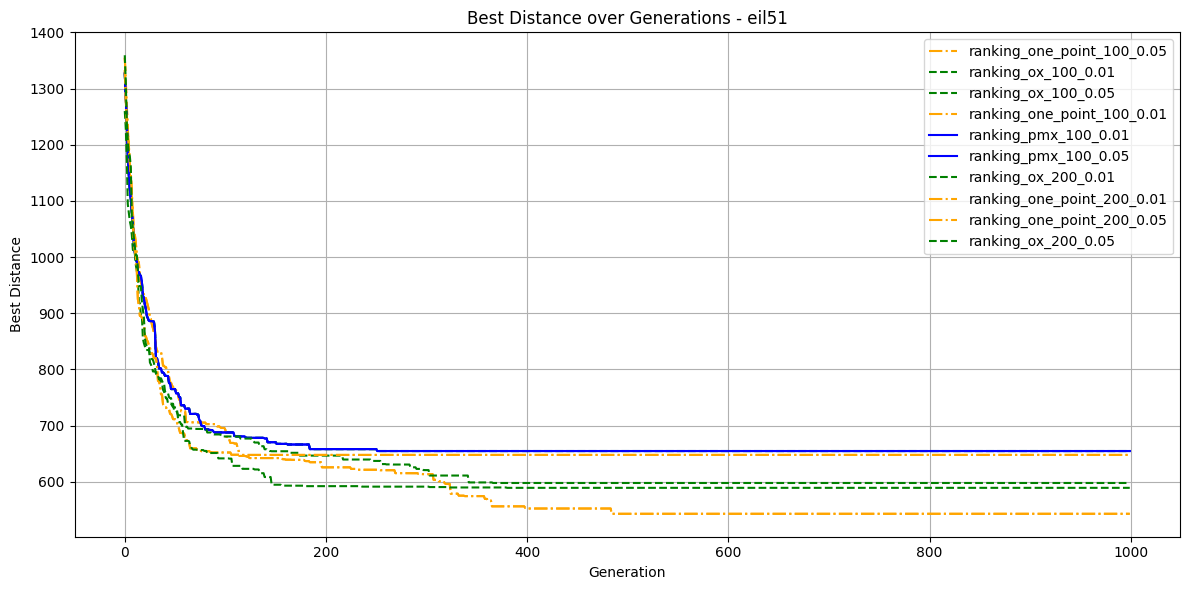


📊 最良結果（各データセットごと）:
berlin52: log_berlin52_tournament_ox_100_0.05.csv -> BestDistance = 9321.069687
eil51: log_eil51_ranking_one_point_100_0.05.csv -> BestDistance = 542.912103


In [11]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import matplotlib.pyplot as plt
import re

# ログファイルがあるディレクトリのパス
log_dir = "/content/drive/MyDrive/class/知能科学/log"

# log_*.csv ファイルを収集
csv_files = [f for f in os.listdir(log_dir) if f.startswith("log_") and f.endswith(".csv")]

# ファイル名から情報を抽出するための正規表現
pattern = re.compile(r"log_(.+?)_(.+?)_(.+?)_(\d+)_(\d+\.\d+)\.csv")

# データセットごとに分類
dataset_groups = {}

for file in csv_files:
    match = pattern.match(file)
    if not match:
        continue
    dataset, selection, crossover, popsize, mutation = match.groups()
    key = dataset
    if key not in dataset_groups:
        dataset_groups[key] = []
    dataset_groups[key].append({
        "file": os.path.join(log_dir, file),
        "selection": selection,
        "crossover": crossover,
        "popsize": int(popsize),
        "mutation": float(mutation)
    })

# 交叉法ごとの色・線種設定
styles = {
    "pmx": ("blue", "-"),
    "ox": ("green", "--"),
    "one_point": ("orange", "-."),
    "two_point": ("red", ":"),
    "uniform": ("purple", "-"),
}

# 最良結果を記録
best_results = {}

# 各データセットごとにグラフ描画と最良結果の抽出
for dataset, runs in dataset_groups.items():
    plt.figure(figsize=(12, 6))
    best_distance = float('inf')
    best_file = ""

    for run in runs:
        file = run["file"]
        label = f'{run["selection"]}_{run["crossover"]}_{run["popsize"]}_{run["mutation"]}'
        df = pd.read_csv(file)

        # スタイル取得（未定義の交叉法はグレー）
        color, linestyle = styles.get(run["crossover"], ("gray", "-"))

        # グラフ描画
        plt.plot(df["Generation"], df["BestDistance"], label=label, color=color, linestyle=linestyle)

        # 最終世代のBestDistanceで比較
        final_best = df["BestDistance"].iloc[-1]
        if final_best < best_distance:
            best_distance = final_best
            best_file = os.path.basename(file)

    plt.title(f"Best Distance over Generations - {dataset}")
    plt.xlabel("Generation")
    plt.ylabel("Best Distance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    best_results[dataset] = (best_file, best_distance)

# 最良結果を出力
print("\n📊 最良結果（各データセットごと）:")
for dataset, (file, dist) in best_results.items():
    print(f"{dataset}: {file} -> BestDistance = {dist}")


## eil51

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


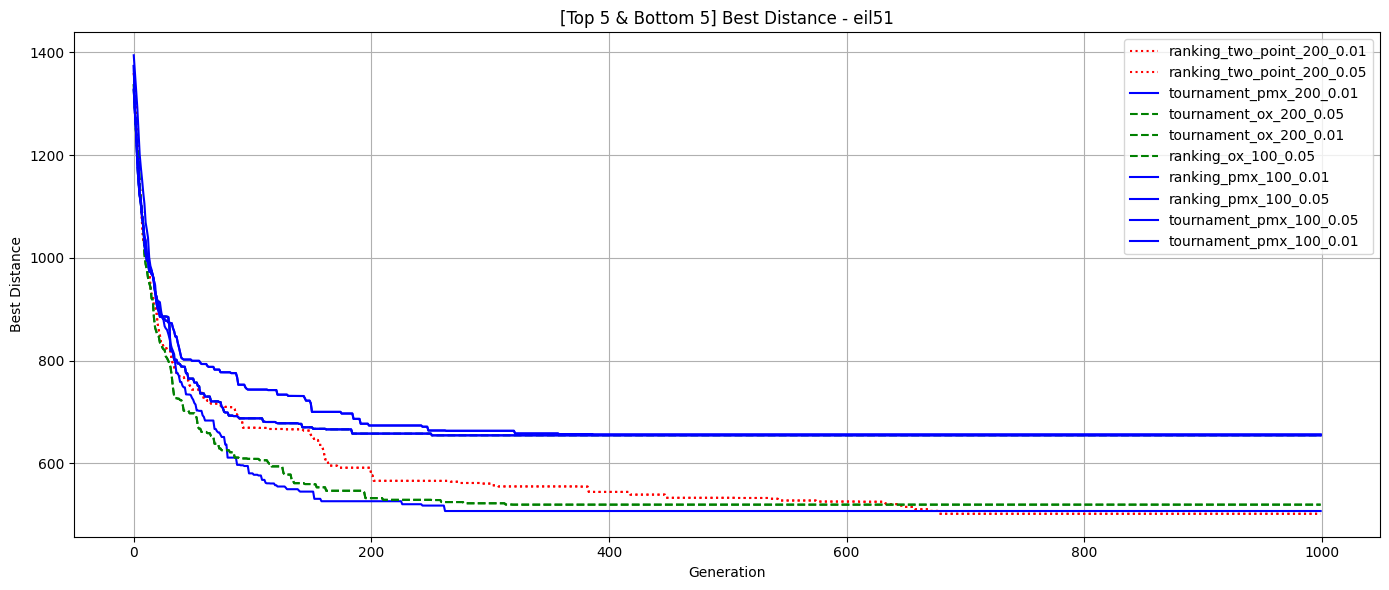


📊 最適性評価: 最終BestDistance 上位/下位5件

🔝 Top 5:
log_eil51_ranking_two_point_200_0.01.csv -> 502.04
log_eil51_ranking_two_point_200_0.05.csv -> 502.04
log_eil51_tournament_pmx_200_0.01.csv -> 507.44
log_eil51_tournament_ox_200_0.05.csv -> 519.83
log_eil51_tournament_ox_200_0.01.csv -> 519.83

🔻 Bottom 5:
log_eil51_ranking_ox_100_0.05.csv -> 654.67
log_eil51_ranking_pmx_100_0.01.csv -> 654.67
log_eil51_ranking_pmx_100_0.05.csv -> 654.67
log_eil51_tournament_pmx_100_0.05.csv -> 656.34
log_eil51_tournament_pmx_100_0.01.csv -> 656.34

📈 安定性評価（最終50世代平均 ± 標準偏差）:
log_eil51_ranking_two_point_200_0.01.csv -> 502.04 ± 0.00
log_eil51_ranking_two_point_200_0.05.csv -> 502.04 ± 0.00
log_eil51_tournament_pmx_200_0.01.csv -> 507.44 ± 0.00
log_eil51_tournament_ox_200_0.05.csv -> 519.83 ± 0.00
log_eil51_tournament_ox_200_0.01.csv -> 519.83 ± 0.00

⚡ 収束速度評価（最初の10%以下まで落ちた世代）:
log_eil51_ranking_two_point_200_0.01.csv -> Generation 4
log_eil51_ranking_two_point_200_0.05.csv -> Generation 4
log_eil51_tournament_p

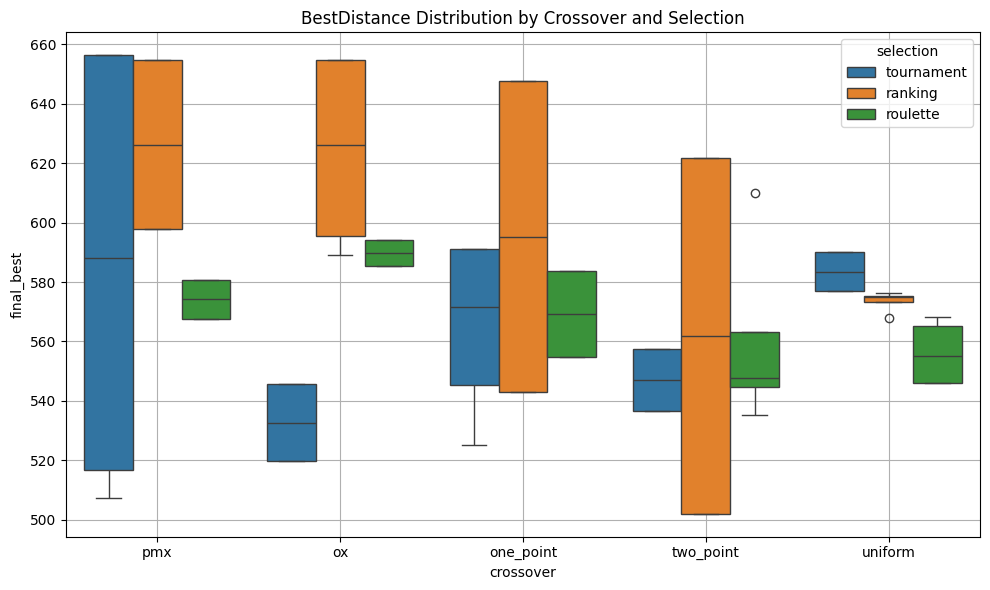

In [21]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# 対象データセット
target_dataset = "eil51"
log_dir = f"/content/drive/MyDrive/class/知能科学/log/{target_dataset}"

pattern = re.compile(r"log_(.+?)_(.+?)_(.+?)_(\d+)_(\d+\.\d+)\.csv")

# スタイル設定（交叉法）
styles = {
    "pmx": ("blue", "-"),
    "ox": ("green", "--"),
    "one_point": ("orange", "-."),
    "two_point": ("red", ":"),
    "uniform": ("purple", "-"),
}

# ファイル読み込み
csv_files = [f for f in os.listdir(log_dir) if f.startswith("log_") and f.endswith(".csv")]
runs = []
for file in csv_files:
    match = pattern.match(file)
    if not match:
        continue
    dataset, selection, crossover, popsize, mutation = match.groups()
    path = os.path.join(log_dir, file)
    df = pd.read_csv(path)
    final_best = df["BestDistance"].iloc[-1]
    avg_last50 = df["BestDistance"].iloc[-50:].mean() if len(df) >= 50 else df["BestDistance"].mean()
    std_last50 = df["BestDistance"].iloc[-50:].std() if len(df) >= 50 else df["BestDistance"].std()

    # 高速収束（10%以内に収束した世代を探す）
    initial = df["BestDistance"].iloc[0]
    threshold = initial * 0.9
    converge_gen = next((i for i, v in enumerate(df["BestDistance"]) if v < threshold), len(df))

    runs.append({
        "file": path,
        "selection": selection,
        "crossover": crossover,
        "popsize": int(popsize),
        "mutation": float(mutation),
        "final_best": final_best,
        "avg_last50": avg_last50,
        "std_last50": std_last50,
        "converge_gen": converge_gen,
        "df": df
    })

# 上位・下位5件を抽出（最終BestDistance）
runs_sorted = sorted(runs, key=lambda x: x["final_best"])
top5 = runs_sorted[:5]
bottom5 = runs_sorted[-5:]

# === プロット ===
plt.figure(figsize=(14, 6))
for run in top5 + bottom5:
    label = f'{run["selection"]}_{run["crossover"]}_{run["popsize"]}_{run["mutation"]}'
    color, linestyle = styles.get(run["crossover"], ("gray", "-"))
    plt.plot(run["df"]["Generation"], run["df"]["BestDistance"],
             label=label, color=color, linestyle=linestyle)
plt.title(f"[Top 5 & Bottom 5] Best Distance - {target_dataset}")
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 統計情報を表示 ===
print(f"\n📊 最適性評価: 最終BestDistance 上位/下位5件\n")
print("🔝 Top 5:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> {run["final_best"]:.2f}')

print("\n🔻 Bottom 5:")
for run in bottom5:
    print(f'{os.path.basename(run["file"])} -> {run["final_best"]:.2f}')

print(f"\n📈 安定性評価（最終50世代平均 ± 標準偏差）:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> {run["avg_last50"]:.2f} ± {run["std_last50"]:.2f}')

print(f"\n⚡ 収束速度評価（最初の10%以下まで落ちた世代）:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> Generation {run["converge_gen"]}')

# === 箱ひげ図による安定性比較 ===
import seaborn as sns
import pandas as pd

summary_df = pd.DataFrame([{
    "crossover": run["crossover"],
    "selection": run["selection"],
    "final_best": run["final_best"],
    "avg_last50": run["avg_last50"],
    "std_last50": run["std_last50"]
} for run in runs])

plt.figure(figsize=(10, 6))
sns.boxplot(data=summary_df, x="crossover", y="final_best", hue="selection")
plt.title("BestDistance Distribution by Crossover and Selection")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import glob
import re
from pathlib import Path
import numpy as np

# データセットを指定
target_dataset = "eil51"
log_dir = f"/content/drive/MyDrive/class/知能科学/log/{target_dataset}/multi"

# ファイル名からパラメータ抽出
pattern_file = re.compile(r"log_(\w+)_(\w+)_(\w+)_([0-9]+)_([0-9.]+)_run[0-9]+\.csv")
pattern_dist = re.compile(r"Total Distance\s*:\s*([\d.]+)")

records = []

# 各ログファイルを読み込んで距離抽出
for filepath in glob.glob(f"{log_dir}/*.csv"):
    match = pattern_file.search(filepath)
    if not match:
        continue
    dataset, selection, crossover, popsize, mutrate = match.groups()
    best_distance = None
    try:
        with open(filepath, "r") as f:
            for line in f:
                m = pattern_dist.search(line)
                if m:
                    best_distance = float(m.group(1))
                    break
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        continue
    if best_distance is not None:
        records.append({
            "dataset": dataset,
            "selection": selection,
            "crossover": crossover,
            "popsize": int(popsize),
            "mutrate": float(mutrate),
            "best": best_distance
        })

# データフレームにまとめて統計処理
df_all = pd.DataFrame(records)

summary = df_all.groupby(
    ["dataset", "selection", "crossover", "popsize", "mutrate"]
).agg(
    best_mean=("best", "mean"),
    best_std=("best", "std"),
    count=("best", "count")
).reset_index()

# 表示と保存
summary.to_csv(f"{log_dir}/summary_total_distance.csv", index=False)
summary

,dataset,selection,crossover,popsize,mutrate,best_mean,best_std,count
0,eil51,tournament,ox,200,0.01,604.893018,0.699699,10
1,eil51,tournament,ox,200,0.05,576.219080,10.809530,10
2,eil51,tournament,pmx,200,0.01,575.546589,38.575148,10
3,eil51_ranking,two,point,200,0.01,635.923386,57.953608,10
4,eil51_ranking,two,point,200,0.05,627.083802,12.218369,10


## kroA100

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


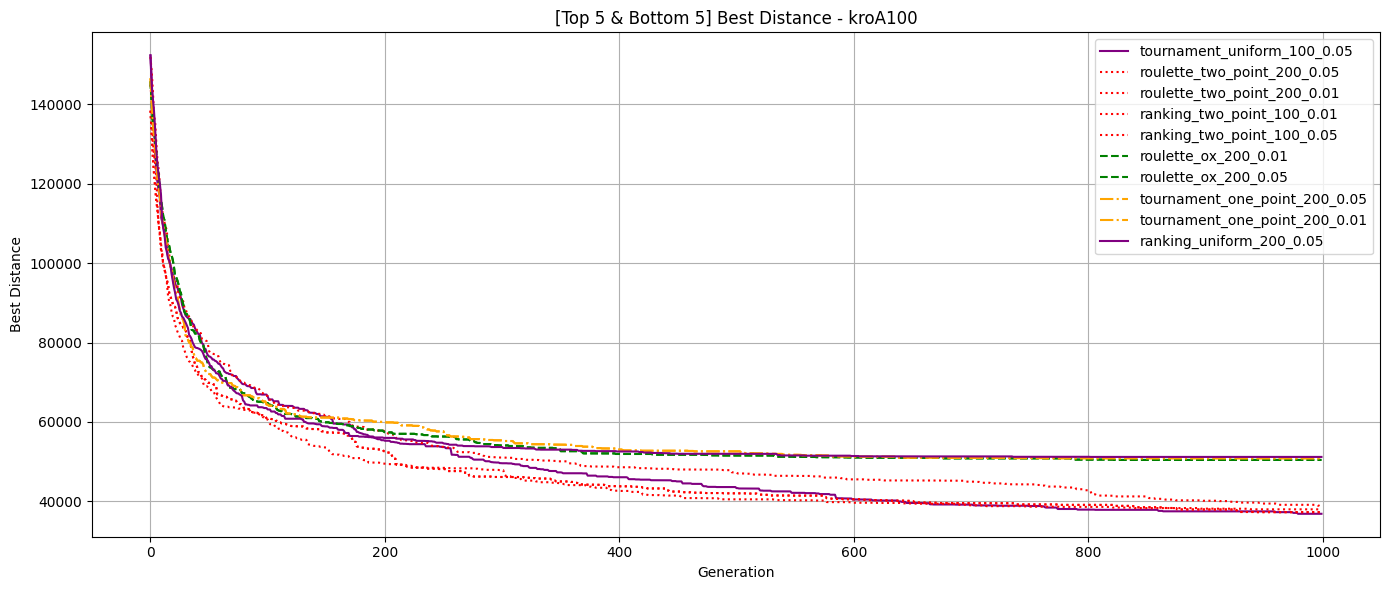


📊 最適性評価: 最終BestDistance 上位/下位5件

🔝 Top 5:
log_kroA100_tournament_uniform_100_0.05.csv -> 36903.29
log_kroA100_roulette_two_point_200_0.05.csv -> 37318.78
log_kroA100_roulette_two_point_200_0.01.csv -> 37318.78
log_kroA100_ranking_two_point_100_0.01.csv -> 38025.93
log_kroA100_ranking_two_point_100_0.05.csv -> 38785.31

🔻 Bottom 5:
log_kroA100_roulette_ox_200_0.01.csv -> 50453.76
log_kroA100_roulette_ox_200_0.05.csv -> 50453.76
log_kroA100_tournament_one_point_200_0.05.csv -> 50866.71
log_kroA100_tournament_one_point_200_0.01.csv -> 50866.71
log_kroA100_ranking_uniform_200_0.05.csv -> 51213.42

📈 安定性評価（最終50世代平均 ± 標準偏差）:
log_kroA100_tournament_uniform_100_0.05.csv -> 37166.84 ± 245.57
log_kroA100_roulette_two_point_200_0.05.csv -> 37318.78 ± 0.00
log_kroA100_roulette_two_point_200_0.01.csv -> 37318.78 ± 0.00
log_kroA100_ranking_two_point_100_0.01.csv -> 38026.24 ± 0.63
log_kroA100_ranking_two_point_100_0.05.csv -> 39214.50 ± 168.43

⚡ 収束速度評価（最初の10%以下まで落ちた世代）:
log_kroA100_tournament_unif

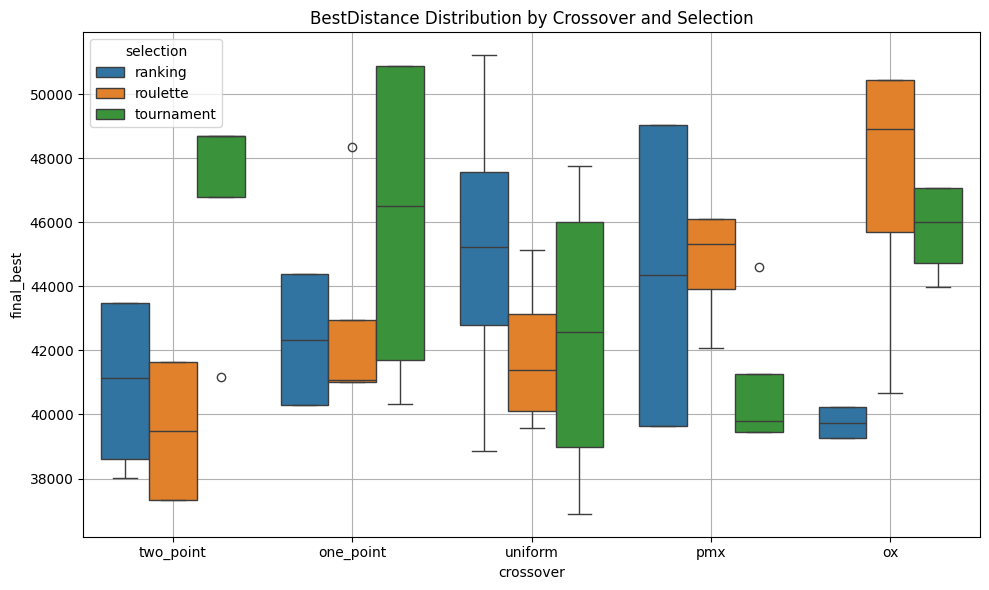

In [22]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# 対象データセット
target_dataset = "kroA100"
log_dir = f"/content/drive/MyDrive/class/知能科学/log/{target_dataset}"

pattern = re.compile(r"log_(.+?)_(.+?)_(.+?)_(\d+)_(\d+\.\d+)\.csv")

# スタイル設定（交叉法）
styles = {
    "pmx": ("blue", "-"),
    "ox": ("green", "--"),
    "one_point": ("orange", "-."),
    "two_point": ("red", ":"),
    "uniform": ("purple", "-"),
}

# ファイル読み込み
csv_files = [f for f in os.listdir(log_dir) if f.startswith("log_") and f.endswith(".csv")]
runs = []
for file in csv_files:
    match = pattern.match(file)
    if not match:
        continue
    dataset, selection, crossover, popsize, mutation = match.groups()
    path = os.path.join(log_dir, file)
    df = pd.read_csv(path)
    final_best = df["BestDistance"].iloc[-1]
    avg_last50 = df["BestDistance"].iloc[-50:].mean() if len(df) >= 50 else df["BestDistance"].mean()
    std_last50 = df["BestDistance"].iloc[-50:].std() if len(df) >= 50 else df["BestDistance"].std()

    # 高速収束（10%以内に収束した世代を探す）
    initial = df["BestDistance"].iloc[0]
    threshold = initial * 0.9
    converge_gen = next((i for i, v in enumerate(df["BestDistance"]) if v < threshold), len(df))

    runs.append({
        "file": path,
        "selection": selection,
        "crossover": crossover,
        "popsize": int(popsize),
        "mutation": float(mutation),
        "final_best": final_best,
        "avg_last50": avg_last50,
        "std_last50": std_last50,
        "converge_gen": converge_gen,
        "df": df
    })

# 上位・下位5件を抽出（最終BestDistance）
runs_sorted = sorted(runs, key=lambda x: x["final_best"])
top5 = runs_sorted[:5]
bottom5 = runs_sorted[-5:]

# === プロット ===
plt.figure(figsize=(14, 6))
for run in top5 + bottom5:
    label = f'{run["selection"]}_{run["crossover"]}_{run["popsize"]}_{run["mutation"]}'
    color, linestyle = styles.get(run["crossover"], ("gray", "-"))
    plt.plot(run["df"]["Generation"], run["df"]["BestDistance"],
             label=label, color=color, linestyle=linestyle)
plt.title(f"[Top 5 & Bottom 5] Best Distance - {target_dataset}")
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 統計情報を表示 ===
print(f"\n📊 最適性評価: 最終BestDistance 上位/下位5件\n")
print("🔝 Top 5:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> {run["final_best"]:.2f}')

print("\n🔻 Bottom 5:")
for run in bottom5:
    print(f'{os.path.basename(run["file"])} -> {run["final_best"]:.2f}')

print(f"\n📈 安定性評価（最終50世代平均 ± 標準偏差）:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> {run["avg_last50"]:.2f} ± {run["std_last50"]:.2f}')

print(f"\n⚡ 収束速度評価（最初の10%以下まで落ちた世代）:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> Generation {run["converge_gen"]}')

# === 箱ひげ図による安定性比較 ===
import seaborn as sns
import pandas as pd

summary_df = pd.DataFrame([{
    "crossover": run["crossover"],
    "selection": run["selection"],
    "final_best": run["final_best"],
    "avg_last50": run["avg_last50"],
    "std_last50": run["std_last50"]
} for run in runs])

plt.figure(figsize=(10, 6))
sns.boxplot(data=summary_df, x="crossover", y="final_best", hue="selection")
plt.title("BestDistance Distribution by Crossover and Selection")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import glob
import re
from pathlib import Path
import numpy as np

# データセットを指定
target_dataset = "kroA100"
log_dir = f"/content/drive/MyDrive/class/知能科学/log/{target_dataset}/multi"

# ファイル名からパラメータ抽出
pattern_file = re.compile(r"log_(\w+)_(\w+)_(\w+)_([0-9]+)_([0-9.]+)_run[0-9]+\.csv")
pattern_dist = re.compile(r"Total Distance\s*:\s*([\d.]+)")

records = []

# 各ログファイルを読み込んで距離抽出
for filepath in glob.glob(f"{log_dir}/*.csv"):
    match = pattern_file.search(filepath)
    if not match:
        continue
    dataset, selection, crossover, popsize, mutrate = match.groups()
    best_distance = None
    try:
        with open(filepath, "r") as f:
            for line in f:
                m = pattern_dist.search(line)
                if m:
                    best_distance = float(m.group(1))
                    break
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        continue
    if best_distance is not None:
        records.append({
            "dataset": dataset,
            "selection": selection,
            "crossover": crossover,
            "popsize": int(popsize),
            "mutrate": float(mutrate),
            "best": best_distance
        })

# データフレームにまとめて統計処理
df_all = pd.DataFrame(records)

summary = df_all.groupby(
    ["dataset", "selection", "crossover", "popsize", "mutrate"]
).agg(
    best_mean=("best", "mean"),
    best_std=("best", "std"),
    count=("best", "count")
).reset_index()

# 表示と保存
summary.to_csv(f"{log_dir}/summary_total_distance.csv", index=False)
summary

,dataset,selection,crossover,popsize,mutrate,best_mean,best_std,count
0,kroA100,tournament,uniform,100,0.05,42382.051269,4588.765212,10
1,kroA100_ranking,two,point,100,0.01,41357.319021,2694.663648,10
2,kroA100_ranking,two,point,100,0.05,40842.357540,2651.453710,10
3,kroA100_roulette,two,point,200,0.01,47835.650344,2719.772992,10
4,kroA100_roulette,two,point,200,0.05,40494.516616,3255.936210,10


## eil76

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


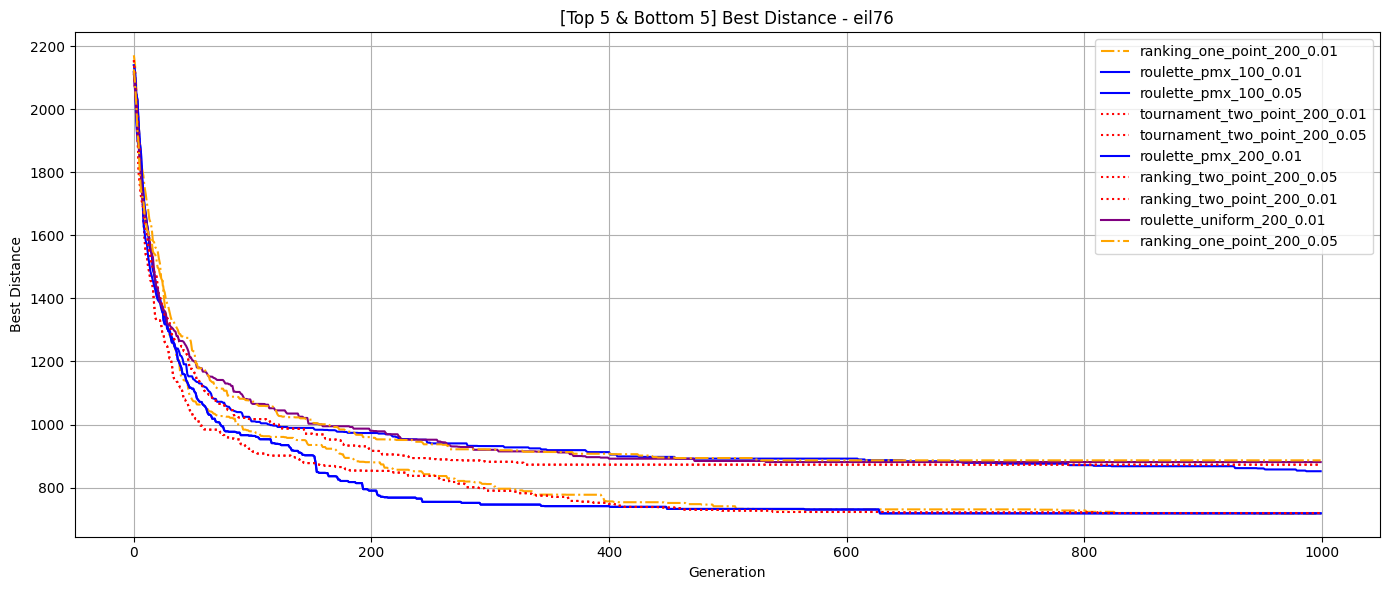


📊 最適性評価: 最終BestDistance 上位/下位5件

🔝 Top 5:
log_eil76_ranking_one_point_200_0.01.csv -> 716.70
log_eil76_roulette_pmx_100_0.01.csv -> 718.15
log_eil76_roulette_pmx_100_0.05.csv -> 718.15
log_eil76_tournament_two_point_200_0.01.csv -> 719.14
log_eil76_tournament_two_point_200_0.05.csv -> 719.14

🔻 Bottom 5:
log_eil76_roulette_pmx_200_0.01.csv -> 851.76
log_eil76_ranking_two_point_200_0.05.csv -> 872.54
log_eil76_ranking_two_point_200_0.01.csv -> 872.54
log_eil76_roulette_uniform_200_0.01.csv -> 880.84
log_eil76_ranking_one_point_200_0.05.csv -> 886.37

📈 安定性評価（最終50世代平均 ± 標準偏差）:
log_eil76_ranking_one_point_200_0.01.csv -> 716.70 ± 0.00
log_eil76_roulette_pmx_100_0.01.csv -> 718.15 ± 0.00
log_eil76_roulette_pmx_100_0.05.csv -> 718.15 ± 0.00
log_eil76_tournament_two_point_200_0.01.csv -> 719.14 ± 0.00
log_eil76_tournament_two_point_200_0.05.csv -> 719.14 ± 0.00

⚡ 収束速度評価（最初の10%以下まで落ちた世代）:
log_eil76_ranking_one_point_200_0.01.csv -> Generation 4
log_eil76_roulette_pmx_100_0.01.csv -> Generat

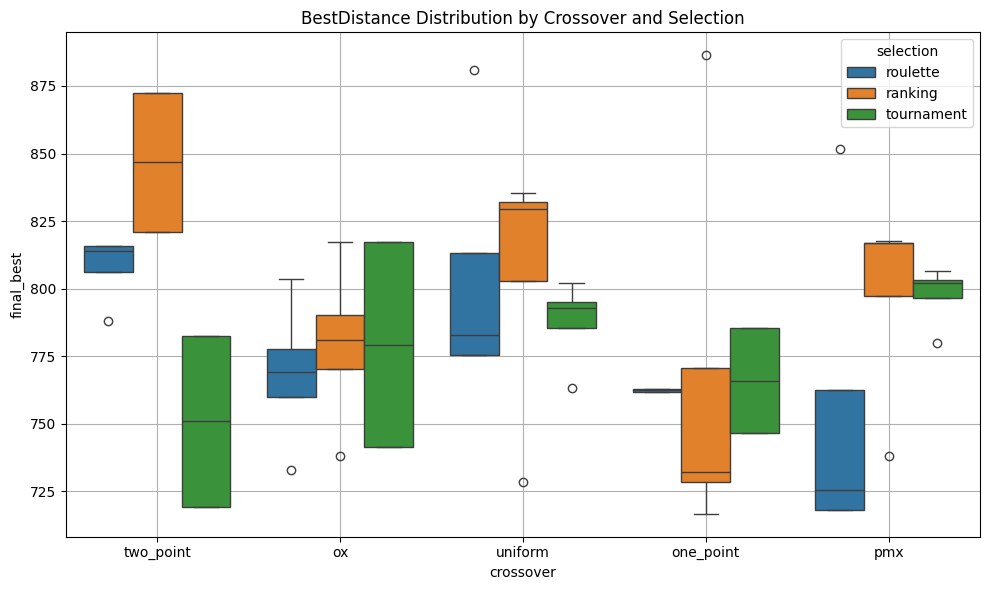

In [23]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# 対象データセット
target_dataset = "eil76"
log_dir = f"/content/drive/MyDrive/class/知能科学/log/{target_dataset}"

pattern = re.compile(r"log_(.+?)_(.+?)_(.+?)_(\d+)_(\d+\.\d+)\.csv")

# スタイル設定（交叉法）
styles = {
    "pmx": ("blue", "-"),
    "ox": ("green", "--"),
    "one_point": ("orange", "-."),
    "two_point": ("red", ":"),
    "uniform": ("purple", "-"),
}

# ファイル読み込み
csv_files = [f for f in os.listdir(log_dir) if f.startswith("log_") and f.endswith(".csv")]
runs = []
for file in csv_files:
    match = pattern.match(file)
    if not match:
        continue
    dataset, selection, crossover, popsize, mutation = match.groups()
    path = os.path.join(log_dir, file)
    df = pd.read_csv(path)
    final_best = df["BestDistance"].iloc[-1]
    avg_last50 = df["BestDistance"].iloc[-50:].mean() if len(df) >= 50 else df["BestDistance"].mean()
    std_last50 = df["BestDistance"].iloc[-50:].std() if len(df) >= 50 else df["BestDistance"].std()

    # 高速収束（10%以内に収束した世代を探す）
    initial = df["BestDistance"].iloc[0]
    threshold = initial * 0.9
    converge_gen = next((i for i, v in enumerate(df["BestDistance"]) if v < threshold), len(df))

    runs.append({
        "file": path,
        "selection": selection,
        "crossover": crossover,
        "popsize": int(popsize),
        "mutation": float(mutation),
        "final_best": final_best,
        "avg_last50": avg_last50,
        "std_last50": std_last50,
        "converge_gen": converge_gen,
        "df": df
    })

# 上位・下位5件を抽出（最終BestDistance）
runs_sorted = sorted(runs, key=lambda x: x["final_best"])
top5 = runs_sorted[:5]
bottom5 = runs_sorted[-5:]

# === プロット ===
plt.figure(figsize=(14, 6))
for run in top5 + bottom5:
    label = f'{run["selection"]}_{run["crossover"]}_{run["popsize"]}_{run["mutation"]}'
    color, linestyle = styles.get(run["crossover"], ("gray", "-"))
    plt.plot(run["df"]["Generation"], run["df"]["BestDistance"],
             label=label, color=color, linestyle=linestyle)
plt.title(f"[Top 5 & Bottom 5] Best Distance - {target_dataset}")
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 統計情報を表示 ===
print(f"\n📊 最適性評価: 最終BestDistance 上位/下位5件\n")
print("🔝 Top 5:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> {run["final_best"]:.2f}')

print("\n🔻 Bottom 5:")
for run in bottom5:
    print(f'{os.path.basename(run["file"])} -> {run["final_best"]:.2f}')

print(f"\n📈 安定性評価（最終50世代平均 ± 標準偏差）:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> {run["avg_last50"]:.2f} ± {run["std_last50"]:.2f}')

print(f"\n⚡ 収束速度評価（最初の10%以下まで落ちた世代）:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> Generation {run["converge_gen"]}')

# === 箱ひげ図による安定性比較 ===
import seaborn as sns
import pandas as pd

summary_df = pd.DataFrame([{
    "crossover": run["crossover"],
    "selection": run["selection"],
    "final_best": run["final_best"],
    "avg_last50": run["avg_last50"],
    "std_last50": run["std_last50"]
} for run in runs])

plt.figure(figsize=(10, 6))
sns.boxplot(data=summary_df, x="crossover", y="final_best", hue="selection")
plt.title("BestDistance Distribution by Crossover and Selection")
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import glob
import re
from pathlib import Path
import numpy as np

# データセットを指定
target_dataset = "eil76"
log_dir = f"/content/drive/MyDrive/class/知能科学/log/{target_dataset}/multi"

# ファイル名からパラメータ抽出
pattern_file = re.compile(r"log_(\w+)_(\w+)_(\w+)_([0-9]+)_([0-9.]+)_run[0-9]+\.csv")
pattern_dist = re.compile(r"Total Distance\s*:\s*([\d.]+)")

records = []

# 各ログファイルを読み込んで距離抽出
for filepath in glob.glob(f"{log_dir}/*.csv"):
    match = pattern_file.search(filepath)
    if not match:
        continue
    dataset, selection, crossover, popsize, mutrate = match.groups()
    best_distance = None
    try:
        with open(filepath, "r") as f:
            for line in f:
                m = pattern_dist.search(line)
                if m:
                    best_distance = float(m.group(1))
                    break
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        continue
    if best_distance is not None:
        records.append({
            "dataset": dataset,
            "selection": selection,
            "crossover": crossover,
            "popsize": int(popsize),
            "mutrate": float(mutrate),
            "best": best_distance
        })

# データフレームにまとめて統計処理
df_all = pd.DataFrame(records)

summary = df_all.groupby(
    ["dataset", "selection", "crossover", "popsize", "mutrate"]
).agg(
    best_mean=("best", "mean"),
    best_std=("best", "std"),
    count=("best", "count")
).reset_index()

# 表示と保存
summary.to_csv(f"{log_dir}/summary_total_distance.csv", index=False)
summary

,dataset,selection,crossover,popsize,mutrate,best_mean,best_std,count
0,eil76,roulette,pmx,100,0.01,820.248872,54.073120,10
1,eil76,roulette,pmx,100,0.05,752.318045,43.338689,10
2,eil76_ranking,one,point,200,0.01,763.245371,12.878693,10
3,eil76_tournament,two,point,200,0.01,833.584962,16.747110,10
4,eil76_tournament,two,point,200,0.05,763.032047,33.419312,10


## berlin52

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


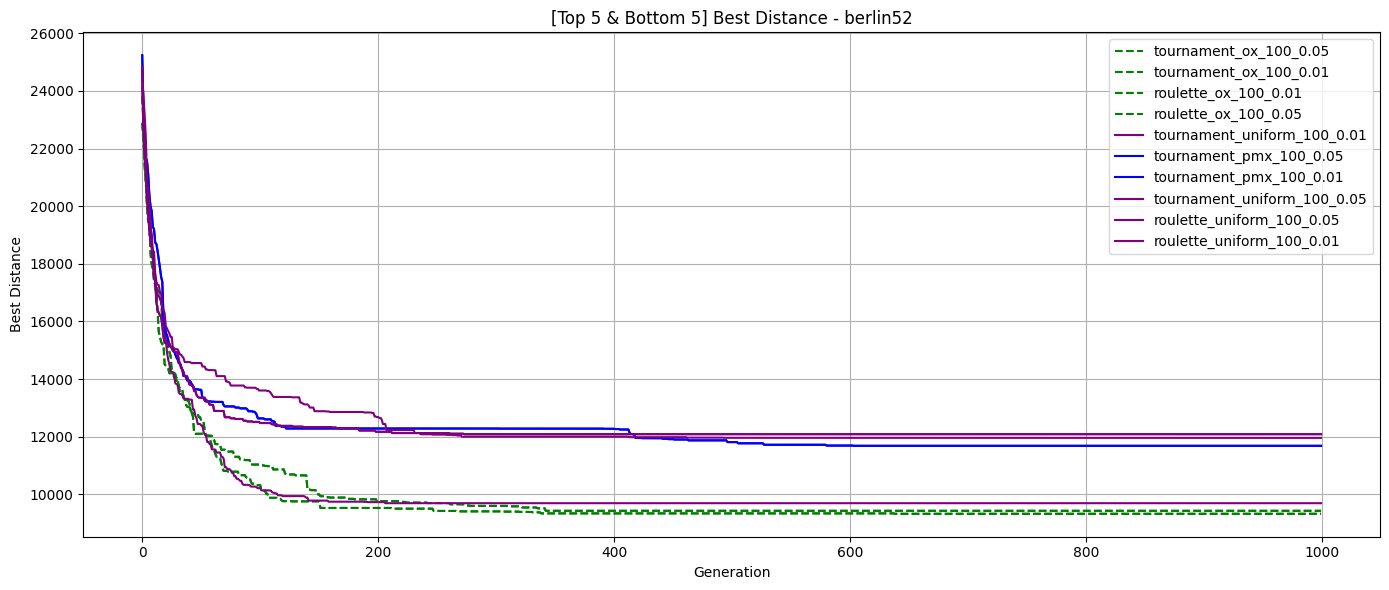


📊 最適性評価: 最終BestDistance 上位/下位5件

🔝 Top 5:
log_berlin52_tournament_ox_100_0.05.csv -> 9321.07
log_berlin52_tournament_ox_100_0.01.csv -> 9321.07
log_berlin52_roulette_ox_100_0.01.csv -> 9424.78
log_berlin52_roulette_ox_100_0.05.csv -> 9424.78
log_berlin52_tournament_uniform_100_0.01.csv -> 9689.48

🔻 Bottom 5:
log_berlin52_tournament_pmx_100_0.05.csv -> 11681.13
log_berlin52_tournament_pmx_100_0.01.csv -> 11681.13
log_berlin52_tournament_uniform_100_0.05.csv -> 11956.72
log_berlin52_roulette_uniform_100_0.05.csv -> 12084.96
log_berlin52_roulette_uniform_100_0.01.csv -> 12084.96

📈 安定性評価（最終50世代平均 ± 標準偏差）:
log_berlin52_tournament_ox_100_0.05.csv -> 9321.07 ± 0.00
log_berlin52_tournament_ox_100_0.01.csv -> 9321.07 ± 0.00
log_berlin52_roulette_ox_100_0.01.csv -> 9424.78 ± 0.00
log_berlin52_roulette_ox_100_0.05.csv -> 9424.78 ± 0.00
log_berlin52_tournament_uniform_100_0.01.csv -> 9689.48 ± 0.00

⚡ 収束速度評価（最初の10%以下まで落ちた世代）:
log_berlin52_tournament_ox_100_0.05.csv -> Generation 4
log_berlin52_

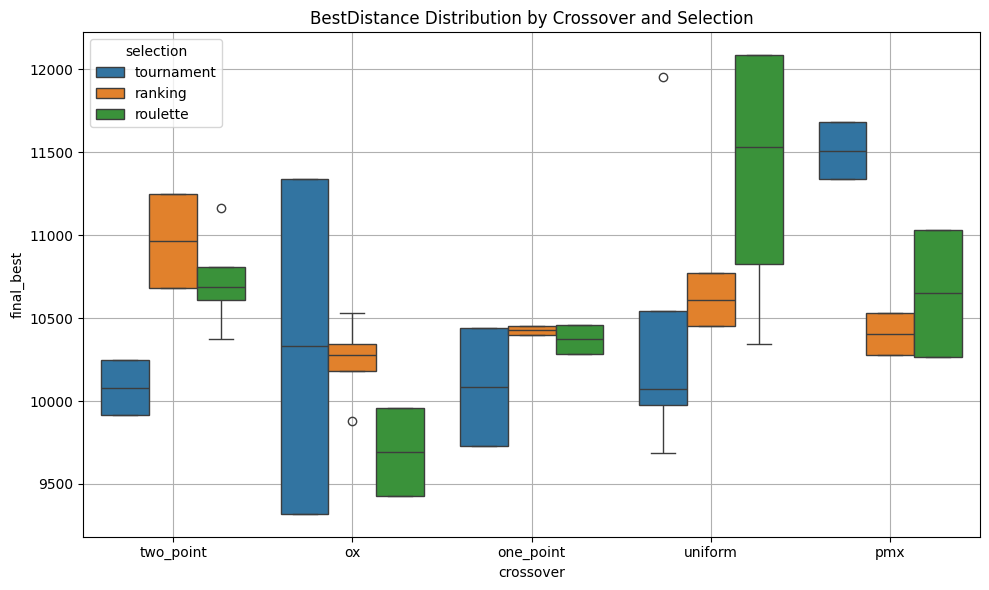

In [24]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

# 対象データセット
target_dataset = "berlin52"
log_dir = f"/content/drive/MyDrive/class/知能科学/log/{target_dataset}"

pattern = re.compile(r"log_(.+?)_(.+?)_(.+?)_(\d+)_(\d+\.\d+)\.csv")

# スタイル設定（交叉法）
styles = {
    "pmx": ("blue", "-"),
    "ox": ("green", "--"),
    "one_point": ("orange", "-."),
    "two_point": ("red", ":"),
    "uniform": ("purple", "-"),
}

# ファイル読み込み
csv_files = [f for f in os.listdir(log_dir) if f.startswith("log_") and f.endswith(".csv")]
runs = []
for file in csv_files:
    match = pattern.match(file)
    if not match:
        continue
    dataset, selection, crossover, popsize, mutation = match.groups()
    path = os.path.join(log_dir, file)
    df = pd.read_csv(path)
    final_best = df["BestDistance"].iloc[-1]
    avg_last50 = df["BestDistance"].iloc[-50:].mean() if len(df) >= 50 else df["BestDistance"].mean()
    std_last50 = df["BestDistance"].iloc[-50:].std() if len(df) >= 50 else df["BestDistance"].std()

    # 高速収束（10%以内に収束した世代を探す）
    initial = df["BestDistance"].iloc[0]
    threshold = initial * 0.9
    converge_gen = next((i for i, v in enumerate(df["BestDistance"]) if v < threshold), len(df))

    runs.append({
        "file": path,
        "selection": selection,
        "crossover": crossover,
        "popsize": int(popsize),
        "mutation": float(mutation),
        "final_best": final_best,
        "avg_last50": avg_last50,
        "std_last50": std_last50,
        "converge_gen": converge_gen,
        "df": df
    })

# 上位・下位5件を抽出（最終BestDistance）
runs_sorted = sorted(runs, key=lambda x: x["final_best"])
top5 = runs_sorted[:5]
bottom5 = runs_sorted[-5:]

# === プロット ===
plt.figure(figsize=(14, 6))
for run in top5 + bottom5:
    label = f'{run["selection"]}_{run["crossover"]}_{run["popsize"]}_{run["mutation"]}'
    color, linestyle = styles.get(run["crossover"], ("gray", "-"))
    plt.plot(run["df"]["Generation"], run["df"]["BestDistance"],
             label=label, color=color, linestyle=linestyle)
plt.title(f"[Top 5 & Bottom 5] Best Distance - {target_dataset}")
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 統計情報を表示 ===
print(f"\n📊 最適性評価: 最終BestDistance 上位/下位5件\n")
print("🔝 Top 5:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> {run["final_best"]:.2f}')

print("\n🔻 Bottom 5:")
for run in bottom5:
    print(f'{os.path.basename(run["file"])} -> {run["final_best"]:.2f}')

print(f"\n📈 安定性評価（最終50世代平均 ± 標準偏差）:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> {run["avg_last50"]:.2f} ± {run["std_last50"]:.2f}')

print(f"\n⚡ 収束速度評価（最初の10%以下まで落ちた世代）:")
for run in top5:
    print(f'{os.path.basename(run["file"])} -> Generation {run["converge_gen"]}')

# === 箱ひげ図による安定性比較 ===
import seaborn as sns
import pandas as pd

summary_df = pd.DataFrame([{
    "crossover": run["crossover"],
    "selection": run["selection"],
    "final_best": run["final_best"],
    "avg_last50": run["avg_last50"],
    "std_last50": run["std_last50"]
} for run in runs])

plt.figure(figsize=(10, 6))
sns.boxplot(data=summary_df, x="crossover", y="final_best", hue="selection")
plt.title("BestDistance Distribution by Crossover and Selection")
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
import glob
import re
from pathlib import Path
import numpy as np

# データセットを指定
target_dataset = "berlin52"
log_dir = f"/content/drive/MyDrive/class/知能科学/log/{target_dataset}/multi"

# ファイル名からパラメータ抽出
pattern_file = re.compile(r"log_(\w+)_(\w+)_(\w+)_([0-9]+)_([0-9.]+)_run[0-9]+\.csv")
pattern_dist = re.compile(r"Total Distance\s*:\s*([\d.]+)")

records = []

# 各ログファイルを読み込んで距離抽出
for filepath in glob.glob(f"{log_dir}/*.csv"):
    match = pattern_file.search(filepath)
    if not match:
        continue
    dataset, selection, crossover, popsize, mutrate = match.groups()
    best_distance = None
    try:
        with open(filepath, "r") as f:
            for line in f:
                m = pattern_dist.search(line)
                if m:
                    best_distance = float(m.group(1))
                    break
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        continue
    if best_distance is not None:
        records.append({
            "dataset": dataset,
            "selection": selection,
            "crossover": crossover,
            "popsize": int(popsize),
            "mutrate": float(mutrate),
            "best": best_distance
        })

# データフレームにまとめて統計処理
df_all = pd.DataFrame(records)

summary = df_all.groupby(
    ["dataset", "selection", "crossover", "popsize", "mutrate"]
).agg(
    best_mean=("best", "mean"),
    best_std=("best", "std"),
    count=("best", "count")
).reset_index()

# 表示と保存
summary.to_csv(f"{log_dir}/summary_total_distance.csv", index=False)
summary

,dataset,selection,crossover,popsize,mutrate,best_mean,best_std,count
0,berlin52,roulette,ox,100,0.01,10502.825463,39.981058,10
1,berlin52,roulette,ox,100,0.05,10907.907842,562.940160,10
2,berlin52,tournament,ox,100,0.01,10816.984389,431.046217,10
3,berlin52,tournament,ox,100,0.05,11292.517446,471.534357,10
4,berlin52,tournament,uniform,100,0.01,10668.797258,405.533614,10
